In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import patches as pat

In [2]:
# Take raw data and stack to create one matrix with only float values for force
pld_data = np.array((pd.read_csv(f'pldcarrot_cadpeeler1.txt').values.tolist()))
pld_data = np.squeeze(pld_data[:,0])
pld_data = np.char.strip(pld_data, chars=',')
pld_data = np.char.strip(pld_data, chars='Lbs:')
pld_data = pld_data.astype(float)

#append on the peeled data
for i in range(2, 21):
    aa = np.array(pd.read_csv(f'pldcarrot_cadpeeler{i}.txt').values.tolist())
    aa = np.squeeze(aa[:,0])
    aa = np.char.strip(aa, chars=',')
    aa = np.char.strip(aa, chars='Lbs:')
    aa = aa.astype(float)
    pld_data = np.column_stack((pld_data, aa))
    
#append on the unpeeled data
for i in range(3, 20):
    bb = np.array(pd.read_csv(f'unpldcarrot_cadpeeler{i}.txt').values.tolist())
    bb = np.squeeze(bb[:,0])
    bb = np.char.strip(bb, chars=',')
    bb = np.char.strip(bb, chars='Lbs:')
    bb = bb.astype(float)
    pld_data = np.column_stack((pld_data, bb))

In [3]:
#remove all of the first 30 entries of each collum that is below the threshold of 0.04
#and create a new matrix to hold these
new_pld_data = np.zeros_like(pld_data)

#loop over columns to trim and paste in zero array
for col in range(pld_data.shape[1]):
    temp_col = pld_data[ :, col]
    deletes = np.zeros(30, dtype=int)
    for x in range(31):
      if temp_col[x] < 0.04:
        deletes[x] = x
    deletes = np.asarray(deletes, dtype = 'int')
    temp_col = np.delete(temp_col, deletes)
    #assign new spots in matrix for this new collum
    new_pld_data[0:len(temp_col), col] = temp_col
    
#now make matrix 30 X n
pld_data = new_pld_data[0:31, :]

Text(0.5, 1.0, 'Peeled Carrot vs Unpeeled')

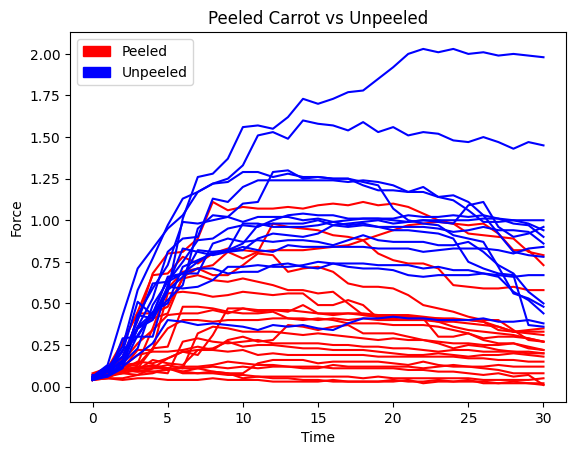

In [4]:
#Below plot shows a comparison of unprocessed plate vs wet plate force data
plt.figure(1)
plt.plot(pld_data[:,0:21], 'r')
plt.plot(pld_data[:,21:36], 'b')
unpld_patch = pat.Patch(color='blue', label='Unpeeled')
peeled_patch = pat.Patch(color='red', label='Peeled')
plt.legend(handles=[peeled_patch, unpld_patch])
plt.xlabel('Time')
plt.ylabel('Force')
plt.title("Peeled Carrot vs Unpeeled")

In [8]:
# Fitting peeled vs unpeeled data to a SVM Model
#use loocv across the 36 trials to get validation accuracy

from sklearn.svm import SVC
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from numpy import mean

model = SVC(kernel='rbf', C=3, gamma='auto')

#define label vector
labels = np.zeros(37)
labels[0:21] = 1

#run model and find scores
cv = LeaveOneOut()
scores = cross_val_score(model, np.transpose(pld_data), labels, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: '+str(mean(scores)))


Accuracy: 0.8918918918918919
